In [1]:
import pandas as pd
import numpy as np
import re
import pickle

In [2]:
# open train text file
f = open(f'./covid_text.pckl','rb')
covid_data = pickle.load(f)
f.close()

In [3]:
f = open(f'./hashtag.pckl','rb')
hashtag = pickle.load(f)
f.close()

In [4]:
## cleaning the tweets
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) #remove @mention
    text = re.sub(r'#','',text) # remove the hashtag symbol
    text = re.sub(r'https?:\/\/\S+', '',text) #remove hyperlink
    text = re.sub(r'\n','',text) # remove \n 
    text = re.sub(r'\r','',text) # remove \r
    text = re.sub(r'[0-9]+','',text) #remove all the number
    text = re.sub(r'\W+', ' ', text) #remove special characters
    text = text.strip().lower()
    if len(text) != 0:
        return text
    else:
        return None
    
for i in range(len(covid_data)):
    for j in range(len(covid_data[i])):
        covid_data[i][j] = clean_text(covid_data[i][j])
    covid_data[i] = [x for x in covid_data[i] if x is not None]
        

In [5]:
# merge source tweeet and reply tweet together for test data    
covid_merge_events=[]
for event in covid_data:
    merge = ''
    for tweet in event:
        merge = merge + tweet
    covid_merge_events.append(merge)

In [6]:
covid_df = pd.DataFrame({'text':covid_merge_events})

nan_value = float("NaN")

covid_df.replace("", nan_value, inplace=True)

covid_df.dropna(axis=0 ,inplace=True)

covid_df.to_csv('covid.tsv', sep='\t',index=False)

In [7]:
covid_df.shape

(17012, 1)

In [8]:
df = pd.read_csv('covid_predict.csv')

In [9]:
df

,text,Predicted
0,according to the new york times warner bros wa...,0
1,hurricane hanna has made landfall in texas the...,0
2,monkeys on the loose in india with stolen coro...,0
3,let s not play blind that the work is fighting...,0
4,if trump felt comfortable having it here then ...,0
...,...,...
17007,i wonder how many lives could ve been saved if...,0
17008,the front page on th march the first line read...,0
17009,trump just completed the racism trifecta in a ...,1
17010,here are a few of my photographs from today s ...,0


In [10]:
df['text'][0]

'according to the new york times warner bros wanted to delay christopher nolan s tenet months ago due to the covid pandemic but nolan refused to listen to any discussions the studio kept the original release date to keep nolan happy'

In [16]:
df_nonrummor = df[df['Predicted'] == 0]

In [17]:
df_nonrummor.shape

(14914, 2)

In [11]:
df_rummor = df[df['Predicted'] == 1]

In [12]:
df_rummor.shape

(2098, 2)

In [13]:
# Installations
import sys
if 'google.colab' in sys.modules:
    !pip install emoji --upgrade
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8

     |████████████████████████████████| 175 kB 5.2 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=ad10252f99444efcf14f641786c016ff21e0a80942aab9100c066e5b5e450bde
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
     |████████████████████████████████| 245 kB 5.3 MB/s 
     |████████████████████████████████| 690 kB 44.0 MB/s 
     |████████████████████████████████| 4.7 MB 34.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 102 kB 34.8 MB/s 
     |████████████████████████████████| 812 kB 50.5 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=9d030d9a0fa4dfb2094f8a9610c16c7a54670b3c82538abd574a073f14541ce9
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655

In [14]:
# Required Libraries

#Base and Cleaning 
import json
import requests
import pandas as pd
import numpy as np
import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 

import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

In [18]:
# rummors = df_rummor['text'].to_numpy()
non_rummors = df_nonrummor['text'].to_numpy()

In [19]:
from gensim.parsing.preprocessing import remove_stopwords

import nltk
nltk.download('punkt')
non_rummor_tokens = []
for rummor in non_rummors:
  rummor = remove_stopwords(rummor)
  token = nltk.word_tokenize(rummor)
  non_rummor_tokens.append(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
from nltk.stem import WordNetLemmatizer
 
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
for tokens in non_rummor_tokens:
  for i in range(len(tokens)):
    tokens[i] = lemmatizer.lemmatize(tokens[i])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [21]:
non_rummor_token_final =[]
for tokens in non_rummor_tokens:
  temp=[]
  for token in tokens:
    if len(token) >=3 and token not in temp:
      temp.append(token)
  non_rummor_token_final.append(temp) 

In [22]:
# Create a id2word dictionary
id2word = Dictionary(non_rummor_token_final)
print(len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in non_rummor_token_final]

167618
41331


In [23]:
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)


In [24]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
coronavirus covid people amp virus know like day test trump

------ Topic 1 ------
covid coronavirus people spread amp virus trump like death china

------ Topic 2 ------
covid coronavirus pandemic people trump case amp need death time

------ Topic 3 ------
coronavirus covid amp people case death like state time new

------ Topic 4 ------
covid coronavirus people death amp case pandemic trump new virus



In [25]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=non_rummor_token_final, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -8.800393051122882

Coherence Score:  0.7114465121375086


In [26]:
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [27]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.027709  0.004562       1        1  29.198864
0     -0.005047 -0.007404       2        1  23.370023
2      0.029530  0.005846       3        1  20.074424
1      0.003850 -0.019103       4        1  14.193594
3     -0.000624  0.016100       5        1  13.163096, topic_info=            Term          Freq         Total Category  logprob  loglift
26   coronavirus  10122.000000  10122.000000  Default  30.0000  30.0000
4          covid  10847.000000  10847.000000  Default  29.0000  29.0000
64        spread   2286.000000   2286.000000  Default  28.0000  28.0000
27         death   3805.000000   3805.000000  Default  27.0000  27.0000
547     american   2236.000000   2236.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
103          die    267.287233   1696.594658   Topic5  -6.4155   0.1797
217        trump    372.888697   3585.438366   Topic5  -6.0826  -0.2356
588       health    318.709161   2575.093122   Topic5  -6.2396  -0.0616
101          day    339.026040   3099.708051   Topic5  -6.1778  -0.1852
499         need    333.909682   3183.717301   Topic5  -6.1930  -0.2272

[514 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
23147      1  0.863489    _aceng
17689      1  0.806741    _bot__
23102      2  0.797217      _cat
242        1  0.276518      able
242        2  0.378475      able
...      ...       ...       ...
6757       4  0.055995      zinc
6757       5  0.093324      zinc
21370      3  0.865396  évoluera
29267      5  0.778658      être
29616      4  0.750738       समर

[1287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 1, 3, 2, 4])

In [28]:
text = [' '.join(map(str, l)) for l in non_rummor_token_final]

In [29]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(text)

In [30]:
# Define Search Param
search_params = {'n_components': [10, 20, 30], 'learning_decay': [.5]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             n_jobs=1,
             param_grid={'n_topics': [10, 20, 30], 
                         'learning_decay': [0.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -3283595.2178142676
Model Perplexity:  14111.51999488476


In [31]:
model_final = LdaMulticore(corpus=corpus,
                       id2word=id2word,
                       num_topics=10,
                       decay=0.5)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [32]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in model_final.print_topics()]
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
covid coronavirus people virus death country amp time like trump

------ Topic 1 ------
covid coronavirus case state death people country amp pandemic need

------ Topic 2 ------
covid coronavirus case people death new amp virus day trump

------ Topic 3 ------
coronavirus covid time death country new know home pandemic going

------ Topic 4 ------
coronavirus covid people like know amp day need pandemic virus

------ Topic 5 ------
covid coronavirus amp people like health work virus spread country

------ Topic 6 ------
covid coronavirus people amp pandemic new trump like case health

------ Topic 7 ------
covid trump amp coronavirus people virus new think american death

------ Topic 8 ------
coronavirus covid people trump pandemic case amp right need come

------ Topic 9 ------
coronavirus covid case virus amp people death need state spread



In [33]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(model_final, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.013276  0.012638       1        1  23.225814
7     -0.022112  0.026194       2        1  23.146957
6      0.027684  0.011453       3        1  12.865477
2      0.029286  0.008074       4        1  11.452265
0      0.009524  0.006965       5        1  10.340856
5     -0.030489  0.010562       6        1   5.745264
1      0.040915 -0.015496       7        1   4.794984
8     -0.051474  0.019002       8        1   4.359459
3      0.010402 -0.011195       9        1   3.026185
9     -0.027012 -0.068199      10        1   1.042740, topic_info=            Term          Freq         Total Category  logprob  loglift
26   coronavirus   9523.000000   9523.000000  Default  30.0000  30.0000
4          covid  10228.000000  10228.000000  Default  29.0000  29.0000
85          case   3760.000000   3760.000000  Default  28.0000  28.0000
27         death   3753.000000   3753.000000  Default  27.0000  27.0000
172       people   5385.000000   5385.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
644         help     17.361521   2002.595431  Topic10  -6.6140  -0.1846
453      country     18.205140   2861.007745  Topic10  -6.5666  -0.4939
210         test     16.760851   2368.688194  Topic10  -6.6493  -0.3877
56          like     17.221277   3650.441092  Topic10  -6.6222  -0.7931
20          time     16.385539   3105.426739  Topic10  -6.6719  -0.6812

[918 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
26980      2  0.902613                   _en
14442      2  0.905115             _governor
14442      5  0.045256             _governor
14442      7  0.045256             _governor
15594      6  0.760651                _party
...      ...       ...                   ...
17794      8  0.041060               youyour
13773      8  0.901168  yulindogmeatfestival
19979      3  0.910062                  zpac
4270       5  0.165177                  zuma
4270       6  0.743295                  zuma

[2670 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 8, 7, 3, 1, 6, 2, 9, 4, 10])

SENTIMENT

In [34]:
    !pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [35]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [36]:
tweetsWithSent = []
for tweet in non_rummors:
  ps = analyzer.polarity_scores(tweet)
  tweetsWithSent.append({'text':tweet, 'compound':ps['compound']})

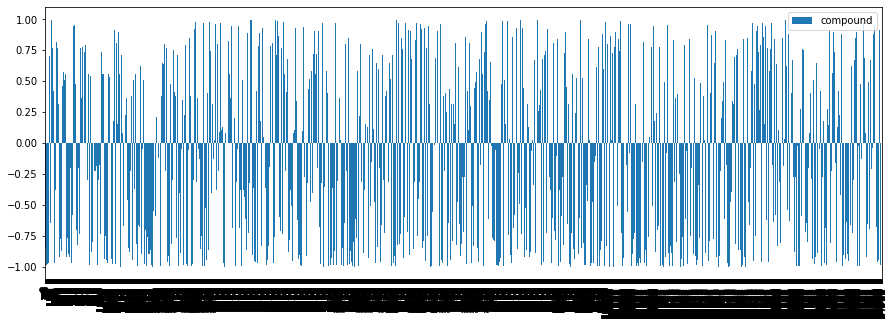

In [37]:
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15,5),width=1)

DONE